# D207 Exploratory Data Analysis 

##### Submitted by Kimberly Hubacek Student ID: 001249836

## TELEMONOP INC							

##  CUSTOMER RETENTION STRATEGY MEETING June 11th, 2023
## EXECUTIVE REPORT

#### TELEMONOP is looking to reduce churn while increasing profits. The purpose of this analysis is to investigate variables that may be associated with higher churn rates.

### A1: Research Question
Can a customer’s marital status predict if they are more likely to churn?

### A2. Stakeholder Benefit
If this study determines marital status is correlated to churn, TELEMONOP can increase the amount of targeted service renewal promotions to customers of different marital statuses to persuade them to renew service contracts with TLEMONOP instead of churning. This may reduce churn while increasing year end profits. If no correlation is found between marital status and churn, TELEMONOP’s marketing department can stop sending out promotional material based on martial status and use the funds in different advertising campaigns to attract new customers.

### A3. Data Identification
The cleaned dataset has fifty columns and 10,000 rows. Each row contains specific information about current TELEMONOP customers. There are a total of 51 independent variables in the dataset with 27 qualitative variables and 24 quantitative variables. There is one dependent variable. This study focuses on the dependent variable, Churn, and the independent variable Marital. The dependent variable Churn represents if a customer discontinued service with TELEMONOP within the past month. Churn is a qualitative categorical data of a nominal type. Whether a customer churned is represented by a "yes" or a "no" in the data. The independent variable Marital communicates if the customer is married, separated, divorced, widowed, or never married. Like churn, Marital is a qualitative categorical data of a nominal type.

A Chi- Square analysis of the data in the Churn and Marital columns was completed using a NumPy array with the contingency table values and the stats package from the SciPy library.

In [2]:
# Loading libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Loading dataset and renaming it 'churn'
churn = pd.read_csv("C:/Users/khuba/OneDrive/Documents/WGU - Master's in Data Analytics/D207 - Exploratory Data Analysis/churn_clean.csv")

In [4]:
# Info about dataset including column names and non-null values values in each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
# Basic statistics for dataset
churn.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


### B1 and B2. Code and Output
The first step was to count the number of occurrences in each category of the Marital and Churn columns. For the Marital Column, the total number of customers who were divorced, widowed, separated, never married, and married were counted. The total number of customers who ended service with TELEMONOP and the total number of customers who continued service were counted for the Churn data. Pandas value counts function (db.value_counts(‘column_name’)) was used to retrieve and display this information for each column:

For Churn, the counts indicate around 74% continued service with TELEMONOP while around 26% discontinued service.

In [6]:
# Value Counts for depedent variable "Churn"
churn.value_counts('Churn')

Churn
No     7350
Yes    2650
dtype: int64

There are five categories in the Marital column with 10,000 total responses. The category with the least occurrences is Married with 1911. The category with the most occurrences is Divorced with 2092:

In [7]:
# Value counts for independent variable "Marital"
churn.value_counts('Marital')

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
dtype: int64

Next, A contingency table of the Marital and Churn data counts was created utilizing the Pandas crosstab command (pd.crosstab(df.column1, df.column2, margins=True)):
The contingency table was then renamed “ct” to make further coding more efficient.

In [8]:
# Creating a Contigency Table for Chi-square test
pd.crosstab(churn.Marital, churn.Churn, margins=True)

Churn,No,Yes,All
Marital,,,
Divorced,1539,553,2092
Married,1418,493,1911
Never Married,1468,488,1956
Separated,1454,560,2014
Widowed,1471,556,2027
All,7350,2650,10000


In [9]:
# Renaming the Contigency Table "ct" as a shortcut
ct= pd.crosstab(churn.Marital, churn.Churn, margins=True)

The information in the contingency table was used to run a Chi-Square test of independence using SciPy’s stats package in the SciPy library. The stats package enabled researchers to calculate the X-squared statistic, P-value, and degree of freedom in one block of code instead of calculating each individually: 

In [10]:
# Running Chi-Square statistics which will return X2 statistic, P-Value, and Degree of Freedom
obs = np.array([ct.iloc[0][0:4].values,
                  ct.iloc[1][0:4].values])
stats.chi2_contingency(obs)[0:3]

(0.2093005935198423, 0.9006394240467578, 2)

,Marital,Churn
count,10000,10000
unique,5,2
top,Divorced,No
freq,2092,7350


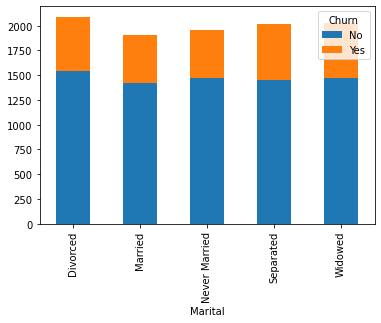

In [11]:
# x2 statistics 0.2093005935198423
# P-value is above 0.05, indicating correlation.
# Degree of Freedom is 2

#Visualization with Pivot Table
tbl =pd.pivot_table(churn.groupby(['Marital','Churn']).size().reset_index(),
values=0,
index='Marital',
columns=['Churn'],
aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)
#Descritpion
churn[['Marital', 'Churn']].describe()

### B3. Justification of Technique
The Chi-Square test was chosen for this analysis since both the dependent variable and independent variable are categorical. Chi-Square is also the most efficient method since it requires no normality tests. If further analysis with categorical variables is required, researchers will be able to easily add the variables to the work done in this study to compare three or more variables using Chi-Square (University of Utah, 2018).

A Test of Independence was chosen over a Goodness of Fit test because the study seeks to discover if the dependent and independent variables are correlated. A goodness of fit test checks if the independent and dependent variables follow a certain distribution and does not suit TELEMONOP’s business needs (Zack, 2021).

This analysis sought to either accept or reject the null hypothesis that there is no correlation between the Marital and Churn data. To do this, they have set the significance level, or alpha, to a value of 0.04. While 0.05 is the standard for statistics, lowering it to 0.04 lowered the risk of incorrectly rejecting the null hypothesis. An alpha value of 0.04 means there was a 4% probability of incorrectly assigning correlation if none was present. If the Chi-Square analysis returned P-Values less than 0.05 the null hypothesis would be rejected. If the P-Values were greater than or equal to 0.05, the null hypothesis would be accepted, and it would prove there was no correlation between the Marital and Churn data (Zhang, 2020).

### C1. Univariate Graphics – Categorical
To further explore the data, visuals and a description of data distribution were created for other variables in the dataset.
A bar graph and pie chart of the Area Column was created to visualize what portion of TELEMONOP’s customers lived in urban, suburban, or rural areas.

The Area column contained 10,000 individual entries within three distinct categories (rural, Suburban, and Urban). While the highest frequency of 3346 occurred in the Suburban tab, the distribution was uniform across all three categories. 

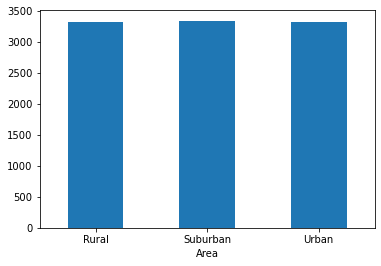

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [12]:
##Univariate Graphics - Categorical
#Bar chart of Area
churn.groupby('Area').size().plot.bar(rot=0)
plt.show()
#description
churn['Area'].describe()

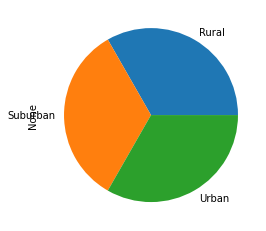

In [13]:
#Pie Chart

churn.groupby('Area').size().plot.pie(rot=0)
plt.show()

Next, a bar graph was created for the Techie column to visualize what percentage of TELEMONOP’s customers view themselves as technically inclined as opposed not technically inclined:

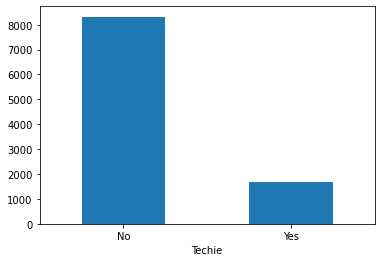

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

In [14]:
#Bar chart of Techie
churn.groupby('Techie').size().plot.bar(rot=0)
plt.show()
#Description
churn['Techie'].describe()

The Techie column contained 10,000 entries and two categories (Yes and No). The top response was “No” at a frequency of 8321. 83% of TELEMONOP’s customers do not view themselves as technically inclined while 17% view themselves as technically inclined.

### C1. Univariate Graphics – Continuous
A histogram of the Yearly Equipment Failure Colum was created to see how often TELEMONOP customers reported failed equipment within one calendar year:

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

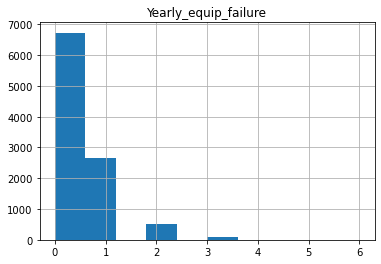

In [15]:
#Histogram of Yearly_equip_failure
churn.hist('Yearly_equip_failure')
#statistics
churn['Yearly_equip_failure'].describe()

There were 10,000 total entries with the zero being the smallest number of equipment failures reported per customer and six being the highest amount of equipment failures reported per customer. The data had a mean of 0.39 and a standard deviation of 0.64. The distribution of data skewed right, and the most frequent occurrence of equipment failure was zero. 

Next, a histogram of the Contacts column was created to visualize how the number of times customers contacted TELEMONOP’s customer service teams to report service issues. 

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

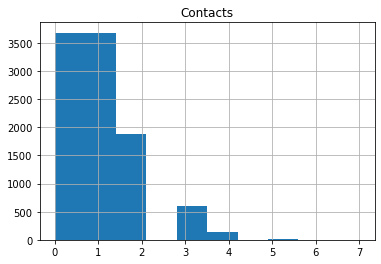

In [16]:
#Histogram of Contacts
churn.hist('Contacts')
#statistics
churn['Contacts'].describe()

There were 10,000 total entries with zero being the least number of contacts reported to TELEMONOP’s customer service team, and seven being the maximum number of contacts reported. The mean was one and the standard deviation was 0.98. While the average number of contacts to the customer service department was one, zero calls to customer service was the most frequent occurrence. The data skewed to the right. 

### D1. Bivariate Graphics: Categorical

A Pivot table was created to visualize the relationship between Churn and Gender. 

Gender was assigned to the X-Axis as the explanatory variable while Churn was assigned to the Y-Axis as the response variable. Both Gender and Churn had a total of 10,000 responses. There were three categories of Gender on the X-axis: Female, Male, and Nonbinary. The data skewed to the right with the highest frequency of occurrence being Female with 5025 out of a total of 10,000 responses. 

The Churn column had two categories, “Yes” and “No.” “No” had the highest occurrence with 7350 responses. Based on the graph, customers who identify as Nonbinary were the least likely to churn. 

,Gender,Churn
count,10000,10000
unique,3,2
top,Female,No
freq,5025,7350


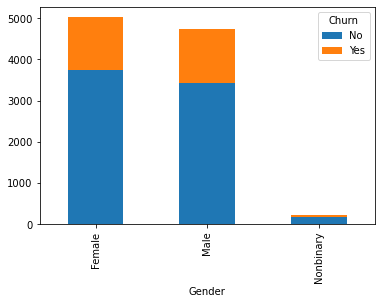

In [17]:
# Pivot table of Churn and Gender
tbl =pd.pivot_table(churn.groupby(['Gender','Churn']).size().reset_index(),
values=0,
index='Gender',
columns=['Churn'],
aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)
#Descritpion
churn[['Gender', 'Churn']].describe()

### D1. Bivariate Graphics: Continuous

A scatterplot was created to visualize the relationship between the Age and Contacts columns.

Age was assigned to the X-Axis as the explanatory variable while Contacts was assigned to the Y-Axis as the response variable. Both Age and Contacts had a total of 10,000 responses. Ages ranged from 18 to 89 with an average age of 53 years old. The number of contacts made to TELEMONOP’s customer service team ranged from zero to seven with the average number of contacts being one. There was a bimodal distribution with contacts to the customer service team peaking at 7 contacts around the ages of 45 and 70. 

,Age,Contacts
count,10000.000000,10000.000000
mean,53.078400,0.994200
std,20.698882,0.988466
min,18.000000,0.000000
25%,35.000000,0.000000
50%,53.000000,1.000000
75%,71.000000,2.000000
max,89.000000,7.000000


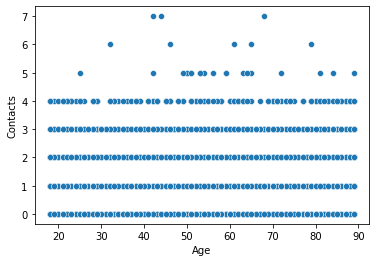

In [18]:
##Bivariate Visual for Continuous Value
#Scatterplot of Age and Contacts
sns.scatterplot(data=churn, x='Age', y='Contacts')
#Statistics
churn[['Age', 'Contacts']].describe()

### E1. Results of Analysis

The Chi-Square analysis returned an X -square statistic of 0.02 and P-Values of 0.09. There were 2 Degrees of Freedom within the Churn and Marital data. With the alpha value set at 0.04, any P-Value above 0.04 would have accepted the null hypothesis. The P-Value of 0.9 accepted our null hypothesis that there is no correlation between marital status and churn. 

### E2. Limitations of Analysis
While Chi-Square is a wonderful way to assess correlation between two or more categorical variables, it does have weaknesses. One of them is sample size sensitivity. A sample that is too large could cause Chi-Square to incorrectly assign statistical significance when none is present. Chi-Square also does not determine the causality if a relationship between variables is present. Also, Chi-Square is not ideal for comparing continuous variables or a continuous variable and a categorical variable. 
While the Chi-Square test established there is no correlation between the Marital and Churn data, more thorough testing is required if TELEMONOP wishes to discover if other variables are correlated with Churn (University of Utah, 2018).

### E3. Recommended Course of Action
Based on findings in this report, there is no connection between a customer’s marital status and the likelihood they will churn.
TELEMONOP’s marketing department is advised to stop sending targeted marketing materials with promotions based on a customer’s marital status and use the money in advertising campaigns to attract new customers.

Additionally, TELEMONOP is encouraged to perform more analyses to determine if any other data categories are correlated with churn.

### G. Third-Party Code Sources

Zhang, D. (2020, August 8). Chi-squared test on attrition. Kaggle. Retrieved September 11, 2022, from https://www.kaggle.com/code/dehaozhang/chi-squared-test-on-attrition/notebook 

Seaborn. (n.d.). Visualizing distributions of data#. Visualizing distributions of data - seaborn 0.12.0 documentation. Retrieved September 11, 2022, from https://seaborn.pydata.org/tutorial/distributions.html 

### H. Academic Sources

University of Utah. (2018). The chi-square test for Independence. Chi-Square - Sociology 3112 - Department of Sociology - The University of Utah. Retrieved September 12, 2022, from https://soc.utah.edu/sociology3112/chi-square.php 

Zach, H. (2021, August 25). Chi-Square Test vs. ANOVA: What's the difference? Statology. Retrieved September 12, 2022, from https://www.statology.org/chi-square-vs-anova/ 

Zhang, D. (2020, August 13). Chi-square test for independence in python with examples from the IBM HR Analytics Dataset. Medium. Retrieved September 12, 2022, from https://towardsdatascience.com/chi-square-test-for-independence-in-python-with-examples-from-the-ibm-hr-analytics-dataset-97b9ec9bb80a 
